In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib # font 변환

%matplotlib inline

matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus']=False

In [3]:
path = "../Resources/"

In [4]:
# csv 파일 불러오기
#Dead_Cause = pd.read_csv('../Resources/사망원인_103항목__성_시도별_사망자수_20190730101054.csv', encoding='euc-kr')

In [5]:
# csv 파일로 새로 저장할 때
#Dead_Cause.to_csv("testfile.csv", mode ='w', encoding='ms949')

In [17]:
def DrawSimpleChart(_xlable, _ylabel, x, y, tags, title):
    # x_lable, y_lable, x, y, title
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    
    ax.scatter(x,y)
        
    #ax.set_xlim(min(x),max(x))
    #plt.xticks([i for i in x], tags)
    #ax.set_xticks([i for i in x])
    #ax.set_xticklabels(tags)
    
    # linear regression line
    a,b = np.polyfit(np.array(x), np.array(y), 1)
    f = lambda x: a * x + b
#     ax.set_xticks([min(x), max(x)])
    
    tx = np.array([min(x), max(x)])
    ax.plot(tx,f(tx), c='r')
    
    # label 회전
#     for label in ax.xaxis.get_ticklabels():
#         label.set_rotation(45)
    
    ax.title.set_text(title)
    # 선형방정식 출력    
    ax.set_xlabel(_xlable+'y= {:.2}x {:+.2}'.format(a,b))
    ax.set_ylabel(_ylabel)
    
    #ax.grid()
    plt.show()
    
    # 상관관계 값 출력
    print(correlation(x,y))

In [42]:
# csv 파일 불러오기
# 1,2,6 번 리소스 세종시 포함
rc1 = People = pd.read_csv('%s1행정구역_시군구_별__성별_인구수.csv' % path, encoding='euc-kr')
rc2 = Car= pd.read_csv('%s2_1인당_자동차_등록대수_시도_시_군_구.csv'% path, encoding='euc-kr')
rc3 = emergencyTime = pd.read_csv('%s3발병_후_응급실_도착_소요시간_현황_시도별.csv' % path, encoding='euc-kr')
rc4 = emergencyZinryo = pd.read_csv('%s4응급진료결과_현황_시도별.csv'% path, encoding='euc-kr')
rc5 = Medic = pd.read_csv('%s5보건의료기관_소재지_및_종류별_활동_보건의료인력수.csv' % path, encoding='euc-kr')
rc6 = Eungp = pd.read_csv('%s6응급의료기관_및_응급의료기관외_응급실_운영기관_수_시도별.csv' % path, encoding='euc-kr')

# 서울 ~ 제주 지역 이름
area = rc6['지역별(1)'][2:].values
type(area)

numpy.ndarray

In [39]:
# DataSet1_6 Setting
DataSet1_6 = pd.DataFrame()
DataSet1_6['지역별'] = area
DataSet1_6['응급실 수'] = np.array(rc6['2015'][2:].values, dtype=int)
DataSet1_6['인원'] = np.array(rc1['2019. 06'][2:].values, dtype=int)
# 세종 제외
DataSet1_6.drop(7 ,inplace=True)

In [40]:
# DataSet1_3 Setting
DataSet1_3 = pd.DataFrame()
DataSet1_3['지역별'] = area
DataSet1_3['응급실 수'] = np.array(rc6['2015'][2:].values, dtype=int)
DataSet1_3['인원'] = np.array(rc1['2019. 06'][2:].values, dtype=int)

In [33]:
#DataSet1_6.sort_values(by=['인원'])
DataSet1_3

,지역별,응급실 수,인원
0,서울,68,9757144
1,부산,39,3427632
2,대구,28,2450478
3,인천,21,2957024
4,광주,24,1459024
5,대전,11,1482938
6,울산,13,1151301
7,세종,2,327643
8,경기,91,13159178
9,강원,28,1540855


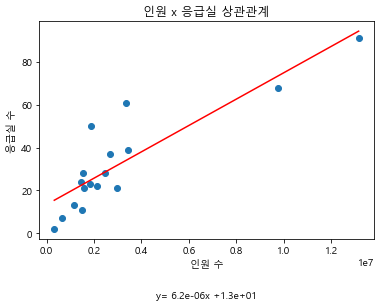

0.872645075765952


In [19]:
DrawSimpleChart("인원 수","응급실 수", DataSet1_6['인원'].values, DataSet1_6['응급실 수'].values, DataSet1_6['지역별'].values, '인원 x 응급실 상관관계')

In [14]:
def data_range(x) :
    return max(x) - min(x)

def quartile(x,p) :
    p_index = int(p * len(x)) 
    return sorted(x) [p_index] 

def interquartile_range(x): 
    return quartile(x,0.75) - quartile(x,0.25)

def mean(x):
    # 평균
    return sum(x) / len(x)

def dot(v,w):
    # 점 리스트 
    return sum(v_i * w_i for v_i, w_i in zip (v,w))

def sum_of_squares(v):
    return dot(v,v)
    
def de_mean(x):
    # 편차
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

def standard_deviation(x):
    # 표준편차
    return math.sqrt(variance(x))

def variance(x):
    # 분산
    n = len(x)
    deviations = de_mean(x) # 편차
    return sum_of_squares(deviations) / (n-1)

def covariance(x,y):
    # 공분산
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n-1)

def correlation(x,y):
    # 상관관계
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x,y) / stdev_x / stdev_y
    else:
        return 0

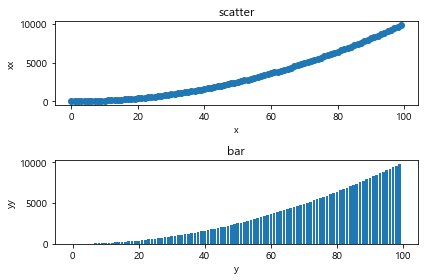

In [131]:
fg = plt.figure()
# add_subplot(행,열,번째)
scatterplot = fg.add_subplot(2,1,1)
barplot = fg.add_subplot(2,1,2)

x = range(0, 100)
y = [v*v for v in x]

#scatterplot.plot(x, y)
scatterplot.title.set_text('scatter')
scatterplot.set_xlabel('x')
scatterplot.set_ylabel('xx')

#barplot.plot(x, y)
barplot.title.set_text('bar')
barplot.set_xlabel('y')
barplot.set_ylabel('yy')

# x,y 값을 순서대로 입력. 데이터셋은 zip or dict or 2 lists
scatterplot.scatter(x,y)
barplot.bar(x, y)

plt.tight_layout()
plt.show()